# Recipe: Accessing PubChem through PUG-REST: Part II

- Author: [Sunghwan Kim](https://orcid.org/0000-0001-9828-2074)
- Reviewer:
- Topic: Accessing the PubChem REST API to access chemical data
- Format: Interactive Jupyter Notebook (Python)
- Target audience:
- Skills:
- Learning outcomes:
- Citation: 'Recipe: Accessing PubChem through PUG-REST - Part II', The IUPAC FAIR Chemistry Cookbook, https://iupac.github.io/WFChemCookbook/recipes/pubchem-pug-rest2.html
- Reuse: This notebook is made available under the IUPAC FAIR Chemistry Cookbook MIT license.

In [1]:
import requests
import time
from IPython.display import Image, display

## 1. Accessing PubChem data using a chemical name

You can access PubChem data using a chemical name.

In [2]:
print("CID             :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/cids/TXT").text.strip())
print("MolecularFormula:", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/property/MolecularFormula/TXT").text.strip())
print("MolecularWeight :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/property/MolecularWeight/TXT").text.strip())
print("IsomericSMILES  :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/property/IsomericSMILES/TXT").text.strip())

CID             : 2244
MolecularFormula: C9H8O4
MolecularWeight : 180.16
IsomericSMILES  : CC(=O)OC1=CC=CC=C1C(=O)O


It is very important to understand that, in the real world, people use a chemical name to refer to different, often closely related, chemicals.  An example is a drug name, as shown in this example.

In [3]:
cids1 = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aleve/cids/TXT").text.strip().split()
print(cids1)

['156391', '23681059', '6925666']


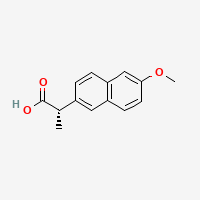

CID 156391 : C14H14O3



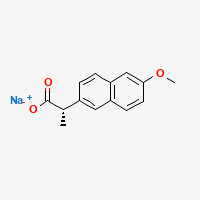

CID 23681059 : C14H13NaO3



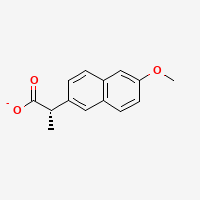

CID 6925666 : C14H13O3-



In [4]:
for mycid in cids1:
    display(Image(requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + mycid + "/record/PNG?image_size=200x200").content))
    print("CID " + mycid, ":", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + mycid + "/property/MolecularFormula/TXT").text)
    time.sleep(0.2)

"**Aleve**" is the name of a drug product, whose active ingredient is **naproxen sodium** (CID 23681059).  When dissolved in water, naproxen sodium dissociates into a **naproxen anion** (CID 6925666), which inhibits with the drug target, and a sodium atom.  Note that the **naproxen anion** is the conjugate base of **naproxen** (CID 156391). While the three CIDs are structurally different, they are all freqently called "Aleve".

It is also possible to get any PubChem compounds records whose name contains the string "aleve" (i.e., **partial matching** with the input name).

In [5]:
cids2 = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aleve/cids/TXT?name_type=word").text.strip().split()
print(cids2)

['23681059', '156391', '6925666', '56841568', '77098502']


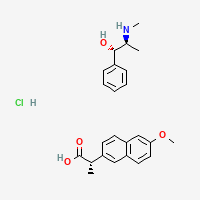

CID 56841568 : C24H30ClNO4



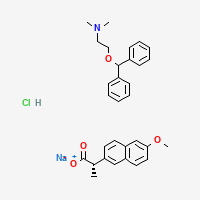

CID 77098502 : C31H35ClNNaO4



In [6]:
cids3 = [ x for x in cids2 if x not in cids1]   # remove the hits from the exact match.

for mycid in cids3:
    display(Image(requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + mycid + "/record/PNG?image_size=200x200").content))
    print("CID " + mycid, ":", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + mycid + "/property/MolecularFormula/TXT").text)
    time.sleep(0.2)

## 2. Getting chemical names for a given chemical structure

In the above example, the two CIDs from partial matching (CIDs 56841568 and CIDs 77098502) are the mixture of naproxen with other compounds.  Because they are from partial matching with the name "aleve", we know their names contain "aleve", but what are they called exactly?  We can figure this out by getting all synonyms for these compounds using PUG-REST.

In [7]:
for mycid in cids3:
    print("#-- CID", mycid)
    print(requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + mycid + "/synonyms/TXT").text)
    time.sleep(0.2)

#-- CID 56841568
141623-29-2
Aleve-D Sinus & Cold
Aleve-D Sinus and Cold
Naproxen / pseudoephedrine
Aleve-D Sinus and headache
Naproxen mixture with pseudoephedrine
Naproxen mixture with pseudoephedrine hydrochloride
DTXSID80931146
2-(6-Methoxynaphthalen-2-yl)propanoic acid--2-(methylamino)-1-phenylpropan-1-ol--hydrogen chloride (1/1/1)

#-- CID 77098502
Aleve PM
Naproxen sodium/DPH combination
Diphenhydramine HCl / naproxen sodium
BAY98-7111
BAY 98-7111
Naproxen Sodium and diphenhydramine combination
Diphenhydramine hydrochloride and naproxen sodium
Diphenhydramine hydrochloride mixture with naproxen sodium
S900006580



CID 56841568 is "Aleve-D Sinus & Cold" and CID 77098502 is "Aleve PM"